In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
tabela_oficial=pd.read_csv('Tabela_de_Bairros.csv',index_col=0, parse_dates = True, na_values = 0, encoding='latin-1',low_memory=False)

In [7]:
tabela_oficial['bairro']

codigo
1                   RECIFE
2            SANTO ANTONIO
3                 SAO JOSE
4       ILHA JOANA BEZERRA
5                  CABANGA
6                  COELHOS
7            ILHA DO LEITE
8                BOA VISTA
9                PAISSANDU
10             SANTO AMARO
11                SOLEDADE
12              ESPINHEIRO
13                 AFLITOS
14                   DERBY
15                JAQUEIRA
16                  GRACAS
17            ENCRUZILHADA
18               ROSARINHO
19             TAMARINEIRA
20              BOA VIAGEM
21                   IPSEP
22                  JORDAO
23                   IBURA
24                    PINA
25        BRASILIA TEIMOSA
26             IMBIRIBEIRA
27                 TORREAO
28            CAMPO GRANDE
29               PEIXINHOS
30               HIPODROMO
              ...         
65                   TORRE
66                   PRADO
67                   ZUMBI
68                CORDEIRO
69                IPUTINGA
70                 TO

In [148]:
def Casos(arq,semana):
    tabela_oficial=pd.read_csv('Tabela_de_Bairros.csv',index_col=0, parse_dates = True, na_values = 0, encoding='latin-1',low_memory=False)
    T=pd.read_csv(arq, parse_dates = True, na_values = 0, encoding='latin-1',low_memory=False)
    L=T[T['semana']==semana]
    bairro=list(L['bairro'])
    #data=dict([(i, bairro.count(i)) for i in tabela_oficial['bairro']])
    #Funciona da mesma forma que:
    data={}
    for i in tabela_oficial['bairro']:
        data[i]=[bairro.count(i)]
    return pd.DataFrame(data)  

In [180]:
def correlation_matrix(arq,t0,t1,e=2):
    C=Casos(arq,t0)
    for i in range(t0,t1):
        C.loc[i]=Casos(arq,i+1).loc[0]
    #return C.corr()
    matrix=np.array(C.corr().fillna(0))
    filter_matrix=[[0 if matrix[i,j]<1-e else matrix[i,j] for i in range(0,94)] for j in range(0,94)]
    return pd.DataFrame(filter_matrix)
   # return np.nan_to_num(correlation)

In [181]:
correlation_matrix('2013.csv',1,52,1)

,0,1,2,3,4,5,6,7,8,9,...,84,85,86,87,88,89,90,91,92,93
0,1.000000,0.000000,0.000000,0.160052,0.000000,0.239102,0.000000,0.202059,0.0,0.000000,...,0.491845,0.083484,0.459533,0.378312,0.328974,0.568057,0.000000,0.271733,0.000000,0.256920
1,0.000000,1.000000,0.458912,0.073817,0.000000,0.000000,0.000000,0.005083,0.0,0.243539,...,0.086159,0.529039,0.074975,0.314626,0.215944,0.176845,0.419188,0.000000,0.000000,0.000000
2,0.000000,0.458912,1.000000,0.000000,0.000000,0.081707,0.075974,0.368259,0.0,0.152824,...,0.012721,0.353042,0.190959,0.233943,0.035948,0.000000,0.055607,0.000000,0.000000,0.114971
3,0.160052,0.073817,0.000000,1.000000,0.000000,0.000000,0.000000,0.047203,0.0,0.000000,...,0.135053,0.188031,0.000000,0.161754,0.020816,0.000000,0.078712,0.389738,0.000000,0.282949
4,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.091409,...,0.000000,0.011131,0.045156,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.239102,0.000000,0.081707,0.000000,0.000000,1.000000,0.347286,0.315630,0.0,0.141394,...,0.570253,0.000000,0.329799,0.303304,0.122976,0.236148,0.000000,0.056043,0.056014,0.305157
6,0.000000,0.000000,0.075974,0.000000,0.000000,0.347286,1.000000,0.088360,0.0,0.131473,...,0.106978,0.000000,0.021904,0.128128,0.000000,0.000000,0.309035,0.000000,0.187500,0.037832
7,0.202059,0.005083,0.368259,0.047203,0.000000,0.315630,0.088360,1.000000,0.0,0.162637,...,0.317043,0.032153,0.224789,0.302936,0.243684,0.247605,0.000000,0.124322,0.000000,0.133715
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.243539,0.152824,0.000000,0.091409,0.141394,0.131473,0.162637,0.0,1.000000,...,0.200085,0.379537,0.059036,0.399602,0.170034,0.254042,0.257464,0.015758,0.000000,0.009285


In [182]:
correlation_matrix('2013.csv',1,52)

,0,1,2,3,4,5,6,7,8,9,...,84,85,86,87,88,89,90,91,92,93
0,1.000000,-0.032556,-0.082918,0.160052,-0.019608,0.239102,-0.040423,0.202059,0.0,-0.019132,...,0.491845,0.083484,0.459533,0.378312,0.328974,0.568057,-0.055228,0.271733,-0.040423,0.256920
1,-0.032556,1.000000,0.458912,0.073817,-0.032556,-0.072181,-0.067116,0.005083,0.0,0.243539,...,0.086159,0.529039,0.074975,0.314626,0.215944,0.176845,0.419188,-0.094431,-0.067116,-0.101566
2,-0.082918,0.458912,1.000000,-0.029246,-0.082918,0.081707,0.075974,0.368259,0.0,0.152824,...,0.012721,0.353042,0.190959,0.233943,0.035948,-0.055607,0.055607,-0.086110,-0.047484,0.114971
3,0.160052,0.073817,-0.029246,1.000000,-0.071134,-0.093643,-0.027496,0.047203,0.0,-0.044344,...,0.135053,0.188031,-0.118047,0.161754,0.020816,-0.032200,0.078712,0.389738,-0.027496,0.282949
4,-0.019608,-0.032556,-0.082918,-0.071134,1.000000,-0.043473,-0.040423,-0.116337,0.0,0.091409,...,-0.094759,0.011131,0.045156,-0.095929,-0.068855,-0.047338,-0.055228,-0.056874,-0.040423,-0.061172
5,0.239102,-0.072181,0.081707,-0.093643,-0.043473,1.000000,0.347286,0.315630,0.0,0.141394,...,0.570253,-0.115685,0.329799,0.303304,0.122976,0.236148,-0.008746,0.056043,0.056014,0.305157
6,-0.040423,-0.067116,0.075974,-0.027496,-0.040423,0.347286,1.000000,0.088360,0.0,0.131473,...,0.106978,-0.126212,0.021904,0.128128,-0.141948,-0.097590,0.309035,-0.117250,0.187500,0.037832
7,0.202059,0.005083,0.368259,0.047203,-0.116337,0.315630,0.088360,1.000000,0.0,0.162637,...,0.317043,0.032153,0.224789,0.302936,0.243684,0.247605,-0.007391,0.124322,-0.075737,0.133715
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,-0.019132,0.243539,0.152824,-0.044344,0.091409,0.141394,0.131473,0.162637,0.0,1.000000,...,0.200085,0.379537,0.059036,0.399602,0.170034,0.254042,0.257464,0.015758,-0.039442,0.009285


In [183]:
def time_series(arq,bairro,t0=1,t1=52):
    if t0<1 or t1>53:
        print('ERRO: t0>=1 and t1<=52!')
    else:
        lista_casos=[Casos(arq,i)[bairro] for i in range(t0,t1+1)]
        #é o mesmo que fazer:
        #lista_casos=[]
        #for i in range(t0,t1+1):
        #    lista_casos.append(Casos(arq,i)[bairro])
    return pd.Series(lista_casos)

In [184]:
def plot_time_series(arq,bairro,cor='crimson'):
    plt.plot(time_series(arq,bairro),marker='o',color=cor)
    plt.xlabel('Semana')
    plt.ylabel('Casos registrados no bairro ' + bairro+' - '+arq[0:-4])

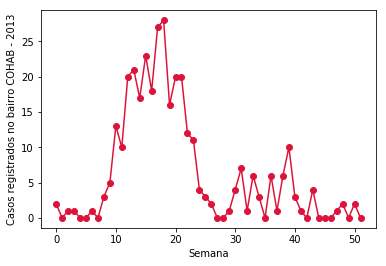

In [185]:
plot_time_series('2013.csv','COHAB')

In [11]:
# Método anterior não otimizado.
#def correlation_matrix(arq,t0,t1):
 #   mat=np.array([[ time_series('2015.csv',i,t0,t1).corr(time_series('2015.csv',j,t0,t1)) for i in tabela_oficial['bairro']] for j in tabela_oficial['bairro']])
 #   return np.nan_to_num(mat)

In [188]:
def save_correlation_matrix(arq,csv,t0,t1,e=2):
    np.savetxt(csv, correlation_matrix(arq,t0,t1,e), delimiter=",") 
    print('Done!')

In [189]:
save_correlation_matrix('2013.csv','Correlacao de Dengue 2013.csv',1,52,1)

Done!


In [190]:
save_correlation_matrix('2014.csv','Correlacao de Dengue 2014.csv',1,52,1)

Done!


In [191]:
save_correlation_matrix('2015.csv','Correlacao de Dengue 2015.csv',1,52,1)

Done!


In [192]:
save_correlation_matrix('2016.csv','Correlacao de Dengue 2016.csv',1,52,1)

Done!
